# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [2]:
# Your code to explore data and train a regression model
# explore the data
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [3]:
# check for missing values
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

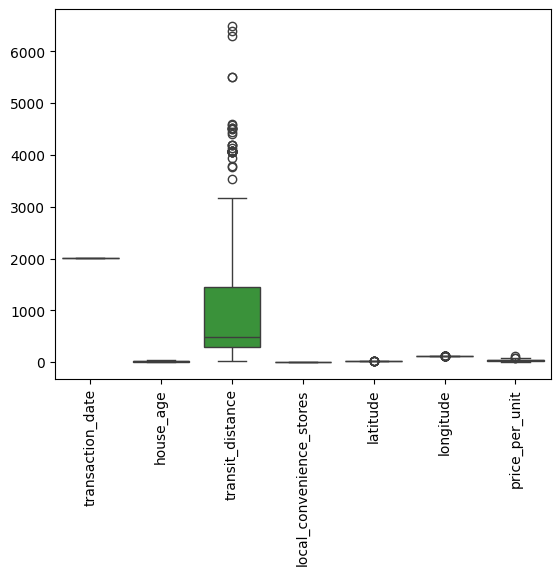

In [6]:
# check for outliers
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

In [14]:
# count transit_distance outliers
data[data['transit_distance'] > 6000].shape

(3, 7)

In [17]:
# sort outliers by transit_distance
data.sort_values(by='transit_distance', ascending=False).head(44)
 

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
347,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2
116,2013.000,30.9,6396.283,1,24.94375,121.47883,12.2
249,2012.833,18.0,6306.153,1,24.95743,121.47516,15.0
8,2013.500,31.7,5512.038,1,24.95095,121.48458,18.8
255,2013.417,31.5,5512.038,1,24.95095,121.48458,17.4
48,2013.417,24.2,4605.749,0,24.94684,121.49578,13.4
176,2012.833,13.9,4573.779,0,24.94867,121.49507,19.2
170,2013.333,24.0,4527.687,0,24.94741,121.49628,14.4
331,2013.333,25.6,4519.690,0,24.94826,121.49587,15.6
30,2013.500,25.9,4519.690,0,24.94826,121.49587,22.1


In [26]:
# normalize the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor

# split the data into features and target variable
X = data.drop('price_per_unit', axis=1)
y = data['price_per_unit']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train a regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# save the model
model_filename = 'models/real_estate_model.pkl'
joblib.dump(model, model_filename)

['models/real_estate_model.pkl']

In [36]:
# Display metrics
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# print 5 rows of predictions
print("\nPredictions:\n", np.round(predictions[:5], 2))


MSE: 32.55706088933617
RMSE: 5.705879501824077
R2: 0.8059304335349275

Predictions:
 [49.65 38.03 55.74 33.04 26.36]


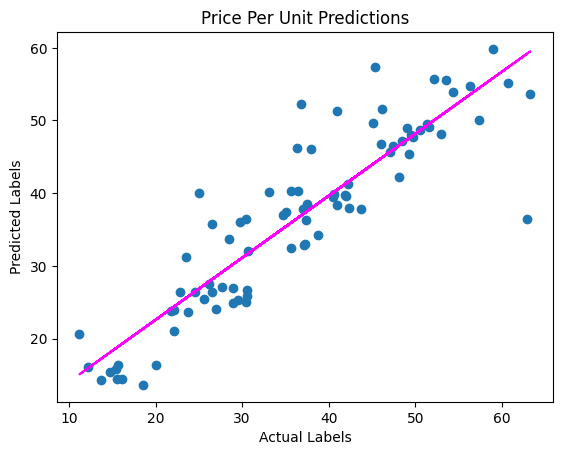

In [22]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price Per Unit Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [23]:
# Your code to use the trained model
# X_test, y_test already defined above
X_test

array([[ 1.12832111e-03, -1.43135245e+00, -7.12135284e-01,
         6.28970939e-01, -2.90663719e-01,  4.68432311e-01],
       [-5.92873640e-01, -3.61517666e-01, -4.66555441e-01,
         2.89900286e-01, -3.35588155e-01,  2.33031189e-01],
       [-2.97651108e-01, -1.52861016e+00, -6.45997083e-01,
        -1.06638232e+00,  4.38556146e-01, -2.20383470e-01],
       [-8.88096171e-01, -4.05725715e-01, -7.31423027e-01,
        -1.06638232e+00,  3.51113940e-01, -2.70539959e-01],
       [-1.77732066e+00,  2.57395022e-01,  9.25528139e-01,
        -3.88241019e-01, -4.90417016e-01, -1.43885177e+00],
       [ 1.48079788e+00,  1.34491303e+00, -5.22215128e-01,
         1.30711224e+00,  5.24393908e-01,  3.50731750e-01],
       [-8.88096171e-01, -1.22794200e-01, -6.33407209e-01,
         2.89900286e-01,  1.01856270e+00,  6.41639386e-01],
       [ 2.96350853e-01, -9.62693710e-02, -6.33407209e-01,
         2.89900286e-01,  1.01856270e+00,  6.41639386e-01],
       [-8.88096171e-01,  1.29186337e+00,  7.131

In [24]:
# Create X_new
X_new = np.array([[2013.167,16.2,289.3248,5,24.98203,121.54348],
                  [2013.000,13.6,4082.015,0,24.94155,121.50381]])   

In [35]:
# load the model
model = joblib.load(model_filename) 

# show existing predictions
# print("\nPrevious predictions:\n", predictions[:5])

# make predictions
new_predictions = model.predict(X_new)
print("\nNew predictions:\n", np.round(new_predictions, 2))  


New predictions:
 [30.12 30.95]
